In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset("tips")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# split data into independent and dependent features

In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
X=df[['total_bill','tip','sex','smoker','day','size']]
y=df["time"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='time', ylabel='tip'>

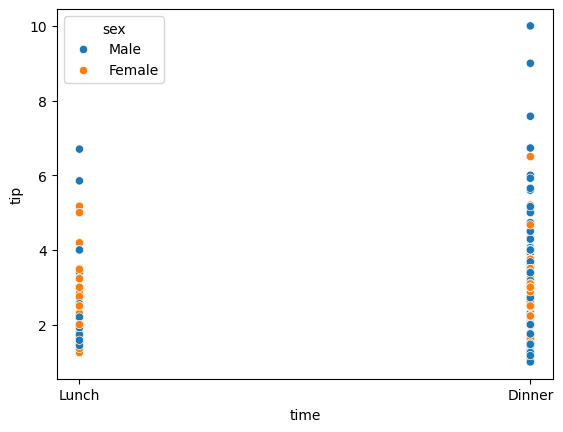

In [52]:
sns.scatterplot(x=df["time"],y=df["tip"],data=df,hue="sex")

In [9]:
#train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
X_train

,total_bill,tip,sex,smoker,day,size
234,15.53,3.00,Male,Yes,Sat,2
227,20.45,3.00,Male,No,Sat,4
180,34.65,3.68,Male,Yes,Sun,4
5,25.29,4.71,Male,No,Sun,4
56,38.01,3.00,Male,Yes,Sat,4
...,...,...,...,...,...,...
106,20.49,4.06,Male,Yes,Sat,2
14,14.83,3.02,Female,No,Sun,2
92,5.75,1.00,Female,Yes,Fri,2
179,34.63,3.55,Male,Yes,Sun,2


In [11]:
y_train

234    Dinner
227    Dinner
180    Dinner
5      Dinner
56     Dinner
        ...  
106    Dinner
14     Dinner
92     Dinner
179    Dinner
102    Dinner
Name: time, Length: 170, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [12]:
#Applying label encoding on Sex and Smoker,since they are binomial categorical features

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le1=LabelEncoder()
le2=LabelEncoder()

In [15]:
#Applying label encoding on train data 
X_train["sex"]=le1.fit_transform(X_train["sex"])
X_train["smoker"]=le2.fit_transform(X_train["smoker"])

In [16]:
X_train.head()

,total_bill,tip,sex,smoker,day,size
234,15.53,3.00,1,1,Sat,2
227,20.45,3.00,1,0,Sat,4
180,34.65,3.68,1,1,Sun,4
5,25.29,4.71,1,0,Sun,4
56,38.01,3.00,1,1,Sat,4


In [17]:
#Similarly apply on test data as well
X_test["sex"]=le1.transform(X_test["sex"])
X_test["smoker"]=le2.transform(X_test["smoker"])

In [18]:
#Now applying OneHotEncoding on day variables since it contains more than two categories
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
ct=ColumnTransformer(transformers=[("onehot",OneHotEncoder(drop="first"),[4])],remainder="passthrough")

In [20]:
X_train=ct.fit_transform(X_train)

In [21]:
X_train

array([[1., 0., 0., ..., 1., 1., 2.],
       [1., 0., 0., ..., 1., 0., 4.],
       [0., 1., 0., ..., 1., 1., 4.],
       ...,
       [0., 0., 0., ..., 0., 1., 2.],
       [0., 1., 0., ..., 1., 1., 2.],
       [1., 0., 0., ..., 0., 1., 3.]])

In [22]:
#To see whole array
import sys 
import numpy as np 
np.set_printoptions(threshold=sys.maxsize)
X_train

array([[ 1.  ,  0.  ,  0.  , 15.53,  3.  ,  1.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 20.45,  3.  ,  1.  ,  0.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  , 34.65,  3.68,  1.  ,  1.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  , 25.29,  4.71,  1.  ,  0.  ,  4.  ],
       [ 1.  ,  0.  ,  0.  , 38.01,  3.  ,  1.  ,  1.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  , 29.8 ,  4.2 ,  0.  ,  0.  ,  6.  ],
       [ 0.  ,  0.  ,  1.  ,  9.78,  1.73,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 25.71,  4.  ,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  , 20.08,  3.15,  1.  ,  0.  ,  3.  ],
       [ 0.  ,  0.  ,  1.  , 11.17,  1.5 ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 38.73,  3.  ,  1.  ,  1.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  , 16.21,  2.  ,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  , 18.35,  2.5 ,  1.  ,  0.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  , 15.42,  1.57,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 24.06,  3.6 ,  1.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.

In [23]:
#similarly apply test data as well
X_test=ct.transform(X_test)

In [24]:
X_test

array([[ 1.  ,  0.  ,  0.  , 19.82,  3.18,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  8.77,  2.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 24.55,  2.  ,  1.  ,  0.  ,  4.  ],
       [ 1.  ,  0.  ,  0.  , 25.89,  5.16,  1.  ,  1.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  , 13.  ,  2.  ,  0.  ,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 17.89,  2.  ,  1.  ,  1.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  , 28.44,  2.56,  1.  ,  1.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  , 12.48,  2.52,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 14.78,  3.23,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  , 15.38,  3.  ,  0.  ,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 18.29,  3.  ,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 10.77,  1.47,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  , 10.65,  1.5 ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 14.48,  2.  ,  1.  ,  1.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  , 10.07,  1.83,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.

In [25]:
#Applying bayes theorem 
#since we are able to see most of the features are in bernouli form i will first apply bernoulis naive bayes and check accuracy score with others

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
bn=BernoulliNB()

In [28]:
bn.fit(X_train,y_train)

BernoulliNB()

In [40]:
y_pred=bn.predict(X_test)

In [43]:
bn.predict([[1.,0. ,0.,25.89, 5.16,1.,1.,4.]])

array(['Dinner'], dtype='<U6')

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9864864864864865
[[55  0]
 [ 1 18]]
              precision    recall  f1-score   support

      Dinner       0.98      1.00      0.99        55
       Lunch       1.00      0.95      0.97        19

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



In [32]:
#similarly we wil compare accuracy wrt to multinomial ans gaussian naive basyes as well

In [33]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [34]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [35]:
mnb.fit(X_train,y_train)
gnb.fit(X_train,y_train)


GaussianNB()

In [36]:
mnb_pred=mnb.predict(X_test)
gnb_predict=gnb.predict(X_test)

In [37]:
#Perfomance metrices for multinomial naive bayes
print(accuracy_score(y_test,mnb_pred))
print(confusion_matrix(y_test,mnb_pred))
print(classification_report(y_test,mnb_pred))

0.9864864864864865
[[55  0]
 [ 1 18]]
              precision    recall  f1-score   support

      Dinner       0.98      1.00      0.99        55
       Lunch       1.00      0.95      0.97        19

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



In [38]:
#Perfomance metrices for Gaussian naive bayes
print(accuracy_score(y_test,gnb_predict))
print(confusion_matrix(y_test,gnb_predict))
print(classification_report(y_test,gnb_predict))

0.9594594594594594
[[52  3]
 [ 0 19]]
              precision    recall  f1-score   support

      Dinner       1.00      0.95      0.97        55
       Lunch       0.86      1.00      0.93        19

    accuracy                           0.96        74
   macro avg       0.93      0.97      0.95        74
weighted avg       0.96      0.96      0.96        74



In [39]:
'''  
conclusion by applying both bernoulis and multinomial naive bayes 
we are getting accuracy around 98% 
and with Gaussian we are getting around 95% wrt to iris dataset
'''

'  \nconclusion by applying both bernoulis and multinomial naive bayes \nwe are getting accuracy around 98% \nand with Gaussian we are getting around 95% wrt to iris dataset\n'